## Import data and dependencies

In [1]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 18745, done.
remote: Total 18745 (delta 0), reused 0 (delta 0), pack-reused 18745
Receiving objects: 100% (18745/18745), 75.03 MiB | 34.24 MiB/s, done.
Resolving deltas: 100% (9622/9622), done.


In [2]:
cd COVID-19/csse_covid_19_data/csse_covid_19_time_series

/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series


In [3]:
ls

README.md
time_series_covid19_confirmed_global.csv
time_series_covid19_confirmed_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_recovered_global.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [0]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [9]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17


In [0]:
confirmed_country = confirmed.drop(columns=['Lat', 'Long']).groupby(['Country/Region']).sum()
deaths_country = deaths.drop(columns=['Lat', 'Long']).groupby(['Country/Region']).sum()
recovered_country = recovered.drop(columns=['Lat', 'Long']).groupby(['Country/Region']).sum()

## Look at number of confirmed, deaths and recovered by date:

In [0]:
confirmed_country_t = confirmed_country.T
deaths_country_t = deaths_country.T
recovered_country_t = recovered_country.T

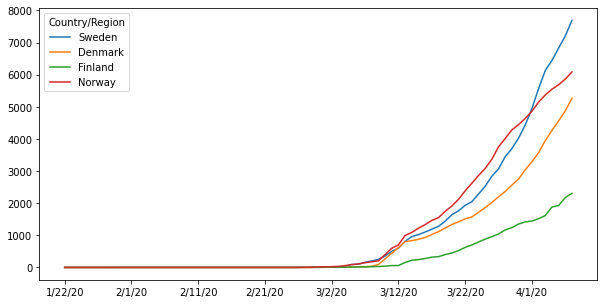

In [12]:
countries = ['Sweden', 'Denmark', 'Finland', 'Norway']
confirmed_country_t[countries].plot.line(figsize=(10, 5))

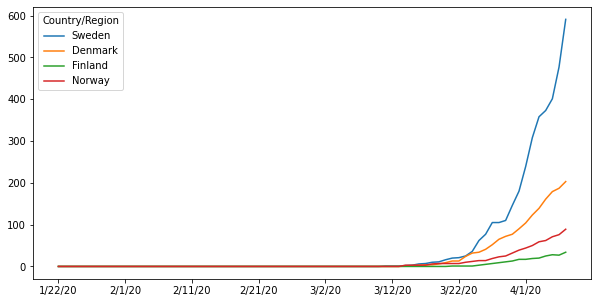

In [13]:
deaths_country_t[countries].plot.line(figsize=(10, 5))

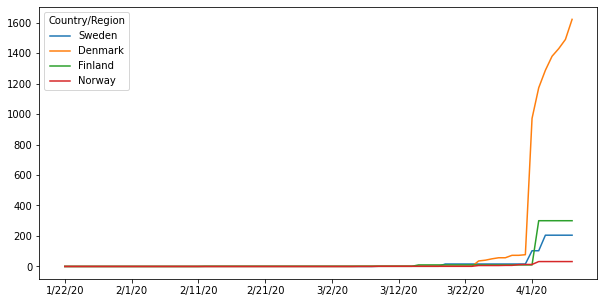

In [14]:
recovered_country_t[countries].plot.line(figsize=(10, 5))

## Calculate day since first 10 cases and day since 1st death because the outbreak date is different in different countries

In [0]:
days_since_10_confirmed = confirmed_country.apply(lambda x: (x > 10).sum(), axis=1)
days_since_1_death = deaths_country.apply(lambda x: (x > 1).sum(), axis=1)
days_since_10_deaths = deaths_country.apply(lambda x: (x > 10).sum(), axis=1)

today = datetime.today()

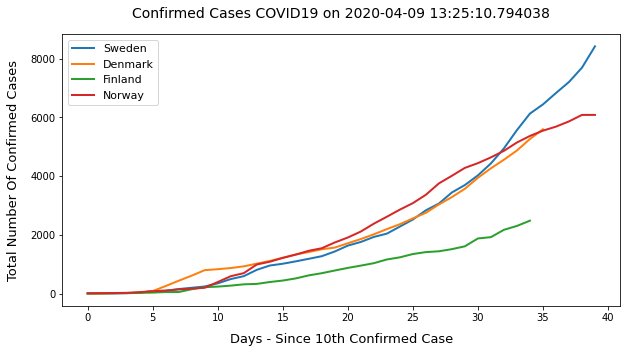

In [10]:
countries = ['Sweden', 'Denmark', 'Finland', 'Norway']
plt.figure(figsize=(10,5))

for country in countries:
  plt.plot(np.arange(0, days_since_10_confirmed[country], 1), confirmed_country_t[country][(len(confirmed_country_t) - days_since_10_confirmed[country]):],
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Confirmed Cases COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 10th Confirmed Case', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Total Number Of Confirmed Cases', fontdict={'fontsize':13}, labelpad=10.0)

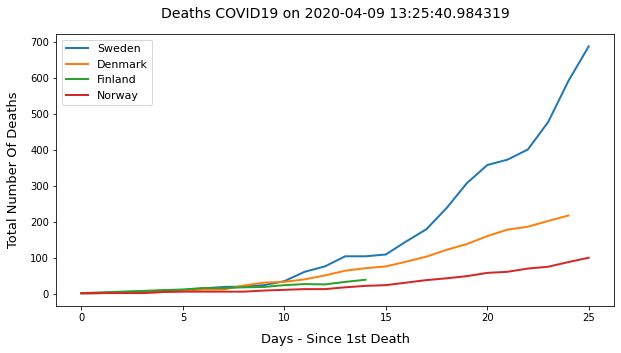

In [11]:
countries = ['Sweden', 'Denmark', 'Finland', 'Norway']
today = datetime.today()
plt.figure(figsize=(10,5))

for country in countries:
  x = np.arange(0, days_since_1_death[country], 1)
  y =  deaths_country_t[country][(len(deaths_country_t) - days_since_1_death[country]):]
  plt.plot(x, y,
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Total Number Of Deaths', fontdict={'fontsize':13}, labelpad=10.0)

## Look at daily increase instead of cumulative number

In [0]:
infected_daily_increase = confirmed_country_t.apply(lambda row: row - row.shift(1))
deaths_daily_increase = deaths_country_t.apply(lambda row: row - row.shift(1))

In [19]:
deaths_daily_increase['Sweden']

1/22/20      NaN
1/23/20      0.0
1/24/20      0.0
1/25/20      0.0
1/26/20      0.0
           ...  
4/4/20      15.0
4/5/20      28.0
4/6/20      76.0
4/7/20     114.0
4/8/20      96.0
Name: Sweden, Length: 78, dtype: float64

### 5 Days Rolling Average

In [0]:
# Calculate 5 days rolling averages since variation from day to day is high:
infected_daily_rollavg = infected_daily_increase.rolling(5).mean()
deaths_daily_rollavg = deaths_daily_increase.rolling(5).mean()

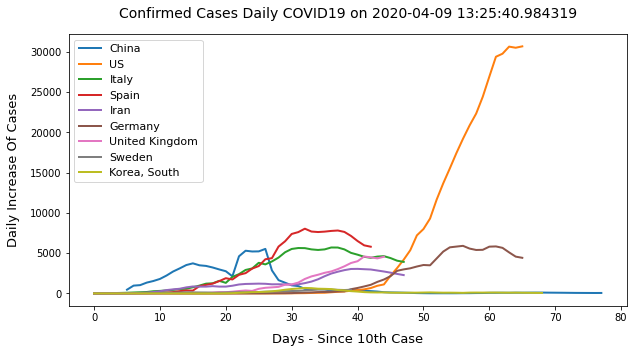

In [24]:
countries = ['China', 'US', 'Italy', 'Spain', 'Iran', 'Germany', 'United Kingdom', 'Sweden', 'Korea, South']
plt.figure(figsize=(10,5))

for country in countries:
  plt.plot(np.arange(0, days_since_10_confirmed[country], 1), infected_daily_rollavg[country][(len(infected_daily_rollavg) - days_since_10_confirmed[country]):],
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Confirmed Cases Daily COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 10th Case', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Cases', fontdict={'fontsize':13}, labelpad=10.0)

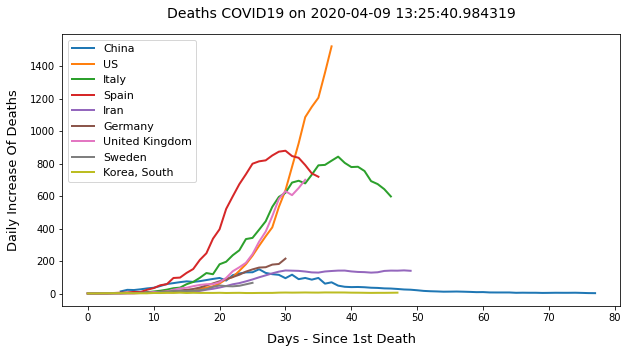

In [25]:
countries = ['China', 'US', 'Italy', 'Spain', 'Iran', 'Germany', 'United Kingdom', 'Sweden', 'Korea, South']
plt.figure(figsize=(10,5))

for country in countries:
  
  plt.plot(np.arange(0, days_since_1_death[country], 1), deaths_daily_rollavg[country][(len(deaths_daily_rollavg) - days_since_1_death[country]):],
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Deaths', fontdict={'fontsize':13}, labelpad=10.0)

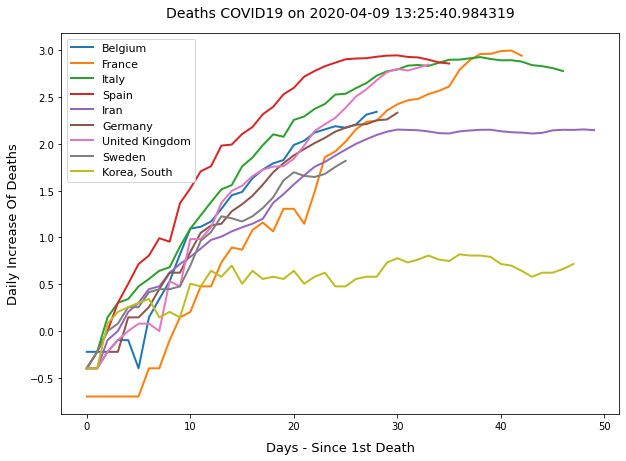

In [15]:
countries = ['Belgium', 'France', 'Italy', 'Spain', 'Iran', 'Germany', 'United Kingdom', 'Sweden', 'Korea, South']
plt.figure(figsize=(10,7))

for country in countries:
  plt.plot(np.arange(0, days_since_1_death[country], 1), np.log10(deaths_daily_rollavg[country][(len(deaths_daily_rollavg) - days_since_1_death[country]):]),
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Deaths', fontdict={'fontsize':13}, labelpad=10.0)

### Did the turning point come for Spain and Italy and what's the delay between infection and death?

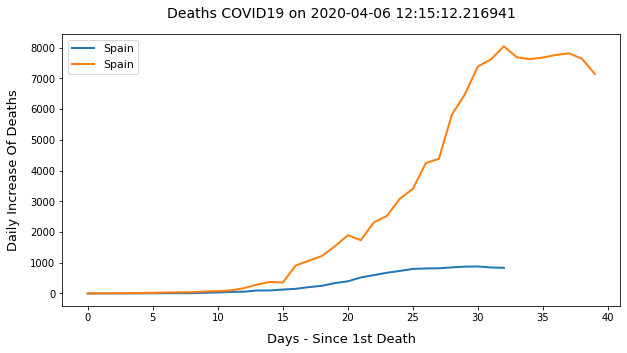

In [120]:
countries = ['Spain']
plt.figure(figsize=(10,5))

for country in countries:
  plt.plot(np.arange(0, days_since_1_death[country], 1), deaths_daily_rollavg[country][(len(deaths_daily_rollavg) - days_since_1_death[country]):],
           label=country, linewidth=2)
  plt.plot(np.arange(0, days_since_10_confirmed[country], 1), infected_daily_rollavg[country][(len(infected_daily_rollavg) - days_since_10_confirmed[country]):],
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Deaths', fontdict={'fontsize':13}, labelpad=10.0)

## Take population into consideration: deaths per 1M people or normalise by population density

In [0]:
population = pd.DataFrame(index=['Sweden', 'Denmark', 'Norway', 'Finland', 'United Kingdom', 'Spain', 'Italy'], 
                          data=[10, 5.603, 5.368, 5.518, 66.65, 46.94, 60.36])

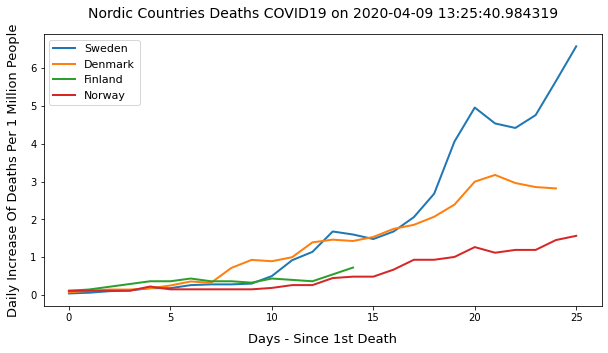

In [26]:
countries = ['Sweden', 'Denmark', 'Finland', 'Norway']
plt.figure(figsize=(10,5))

for country in countries:
  x = np.arange(0, days_since_1_death[country], 1)
  y = deaths_daily_rollavg[country][(len(deaths_daily_rollavg) - days_since_1_death[country]):].values / population.loc[country].values
  plt.plot(x, y,
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Nordic Countries Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Deaths Per 1 Million People', fontdict={'fontsize':13}, labelpad=10.0)

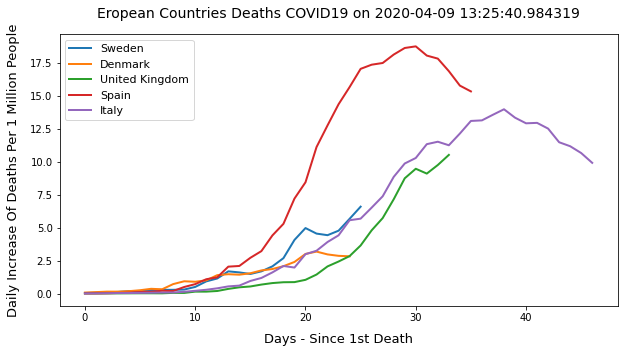

In [27]:
countries = ['Sweden', 'Denmark', 'United Kingdom', 'Spain', 'Italy']
plt.figure(figsize=(10,5))

for country in countries:
  x = np.arange(0, days_since_1_death[country], 1)
  y = deaths_daily_rollavg[country][(len(deaths_daily_rollavg) - days_since_1_death[country]):].values / population.loc[country].values
  plt.plot(x, y,
           label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Eropean Countries Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Deaths Per 1 Million People', fontdict={'fontsize':13}, labelpad=10.0)

* It looks like Sweden is still at its early age of fatality development. 
* Italy and Spain seem to have encountered their turning points. 
* Sweden is likely to be following the Italy way of development, however, the turning point will be much further if we don't implement any lockdown or control measures.

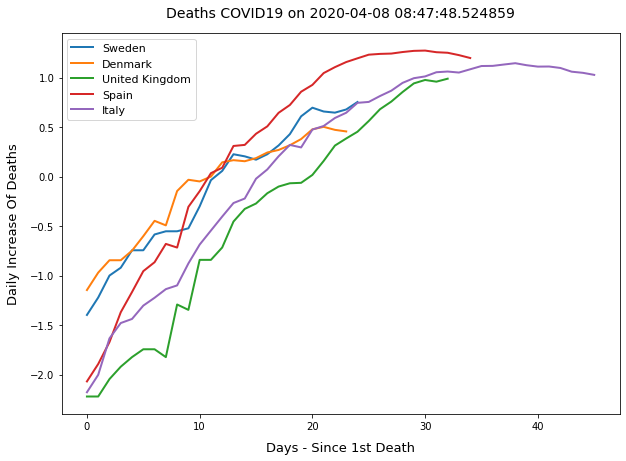

In [27]:
countries = ['Sweden', 'Denmark', 'United Kingdom', 'Spain', 'Italy']

plt.figure(figsize=(10,7))
for country in countries:
  x = np.arange(0, days_since_1_death[country], 1)
  y = deaths_daily_rollavg[country][(len(deaths_daily_rollavg) - days_since_1_death[country]):].values / population.loc[country].values

  plt.plot(x, np.log10(y), label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Deaths COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 1st Death', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Deaths', fontdict={'fontsize':13}, labelpad=10.0)

For both Sweden and UK the death toll is still growing exponentially with no sign of slowing down yet.

## We are likely to severely underestimate the number of cases.

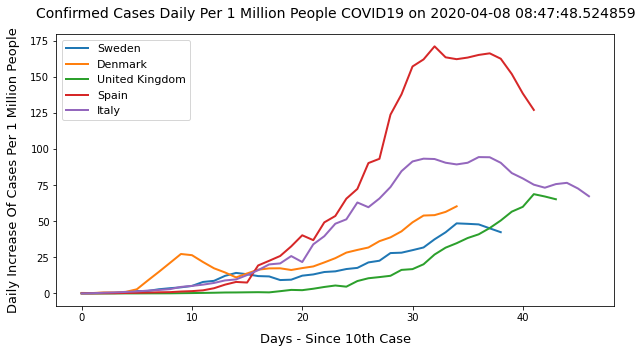

In [28]:
countries = ['Sweden', 'Denmark', 'United Kingdom', 'Spain', 'Italy']
plt.figure(figsize=(10,5))

for country in countries:
  x = np.arange(0, days_since_10_confirmed[country], 1)
  y = (infected_daily_rollavg[country][(len(infected_daily_rollavg) - days_since_10_confirmed[country]):]).values / population.loc[country].values
  plt.plot(x, y, label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Confirmed Cases Daily Per 1 Million People COVID19 on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days - Since 10th Case', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Daily Increase Of Cases Per 1 Million People', fontdict={'fontsize':13}, labelpad=10.0)

## Relation between d(deaths) vs. total deaths


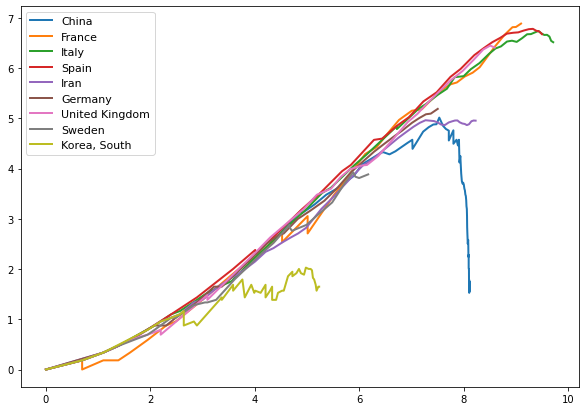

In [56]:
countries = ['China', 'France', 'Italy', 'Spain', 'Iran', 'Germany', 'United Kingdom', 'Sweden', 'Korea, South']
plt.figure(figsize=(10,7))

for country in countries:
  plt.plot(np.log(deaths_country_t[country]+1), np.log(deaths_daily_rollavg[country]+1), label=country, linewidth=2)

plt.legend(loc='upper left', fontsize=11)

## Modelling

In [0]:
def exponential(x, z, k, c):
    return z*np.exp(x*k)+c

def logistic(x, a, b, c):
    return c / (1+np.exp(-(x-b)/a))


## Logistic regression



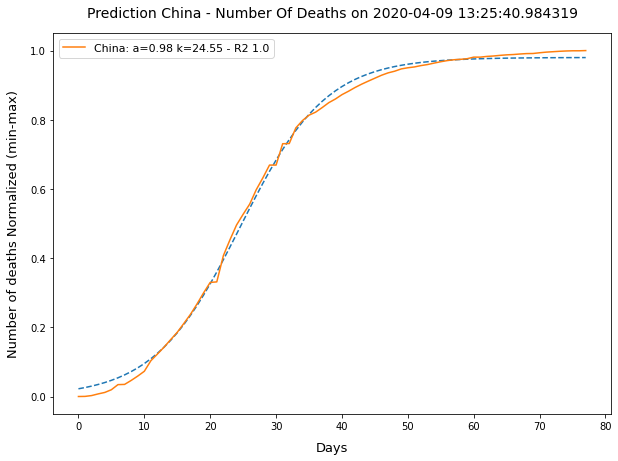

In [46]:
country = 'China'

xdata_real = np.arange(0, days_since_1_death[country], 1)
country_y = deaths_country_t[country][(len(deaths_country_t) - days_since_1_death[country]):]
country_y = (country_y - country_y.min()) / (country_y.max() - country_y.min())

popt, pcov = curve_fit(logistic, xdata_real, country_y)

prevs_to_plot = logistic(xdata_real, *popt)
predicted_func = logistic(xdata_real, *popt)
coefficient_of_dermination = r2_score(country_y,  predicted_func)

plt.figure(figsize=(10,7))
plt.plot(xdata_real, prevs_to_plot, linestyle='dashed')
plt.plot(xdata_real, country_y, \
         label=f"China: a={round(popt[0], 2)} k={round(popt[1], 2)} - R2 {round(coefficient_of_dermination,2)}")

# _ = plt.xticks(ticks=[x for x in xdata_all if x%5 == 0])
plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Prediction China - Number Of Deaths on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Number of deaths Normalized (min-max)', fontdict={'fontsize':13}, labelpad=10.0)


It seems that a logistic regression fits the Chinese fatality data very well.

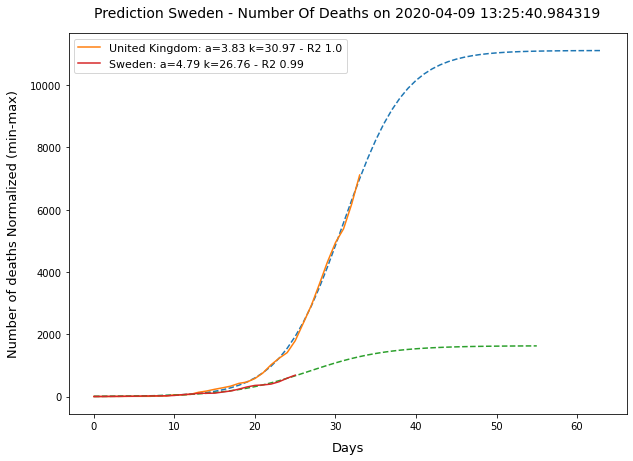

In [53]:
countries = ['United Kingdom', 'Sweden']
ndays_prev = 30

plt.figure(figsize=(10,7))

for country in countries:
  xdata_real = np.arange(0, days_since_1_death[country], 1)
  xdata_all = np.concatenate((xdata_real, np.arange(xdata_real[-1]+1, xdata_real[-1]+ndays_prev+1, 1)))
  country_y = deaths_country_t[country][(len(deaths_country_t) - days_since_1_death[country]):]

  popt, pcov = curve_fit(logistic, xdata_real, country_y)

  prevs_to_plot = logistic(xdata_all, *popt)
  predicted_func = logistic(xdata_real, *popt)
  coefficient_of_dermination = r2_score(country_y,  predicted_func)

  x_data_prev = np.arange(xdata_real[-1]+1, xdata_real[-1]+ndays_prev+1, 1)
  yprevs = prevs_to_plot[(xdata_real[-1]+1):].astype(int).tolist()     

  plt.plot(xdata_all, prevs_to_plot, linestyle='dashed')
  plt.plot(xdata_real, country_y, \
          label=f"{country}: a={round(popt[0], 2)} k={round(popt[1], 2)} - R2 {round(coefficient_of_dermination,2)}")

  # _ = plt.xticks(ticks=[x for x in xdata_all if x%5 == 0])
  plt.legend(loc='upper left', fontsize=11)
  _ = plt.title(f'Prediction Sweden - Number Of Deaths on {today}', fontdict={'fontsize':14}, pad=16.0)
  _ = plt.xlabel('Days', fontdict={'fontsize':13}, labelpad=10.0)
  _ = plt.ylabel('Number of deaths Normalized (min-max)', fontdict={'fontsize':13}, labelpad=10.0)

# for yprev, xday in zip(yprevs, x_data_prev):
#     _ = plt.vlines(x=xday, ymin=0,  ymax=yprev, linestyles='dashed', colors='silver')
#     _ = plt.hlines(y=yprev, xmin=0, xmax=xday, linestyles='dashed', colors='silver')
#     _ = plt.plot(xday, yprev, 'bo', markersize=5)

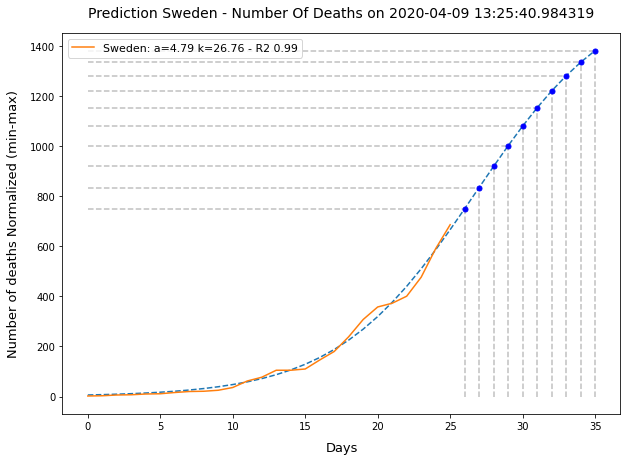

In [38]:
country = 'Sweden'
ndays_prev = 10

xdata_real = np.arange(0, days_since_1_death[country], 1)
xdata_all = np.concatenate((xdata_real, np.arange(xdata_real[-1]+1, xdata_real[-1]+ndays_prev+1, 1)))
country_y = deaths_country_t[country][(len(deaths_country_t) - days_since_1_death[country]):]

popt, pcov = curve_fit(logistic, xdata_real, country_y)

prevs_to_plot = logistic(xdata_all, *popt)
predicted_func = logistic(xdata_real, *popt)
coefficient_of_dermination = r2_score(country_y,  predicted_func)

x_data_prev = np.arange(xdata_real[-1]+1, xdata_real[-1]+ndays_prev+1, 1)
yprevs = prevs_to_plot[(xdata_real[-1]+1):].astype(int).tolist()     

plt.figure(figsize=(10,7))
plt.plot(xdata_all, prevs_to_plot, linestyle='dashed')
plt.plot(xdata_real, country_y, \
         label=f"Sweden: a={round(popt[0], 2)} k={round(popt[1], 2)} - R2 {round(coefficient_of_dermination,2)}")

# _ = plt.xticks(ticks=[x for x in xdata_all if x%5 == 0])
plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Prediction Sweden - Number Of Deaths on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Number of deaths Normalized (min-max)', fontdict={'fontsize':13}, labelpad=10.0)

for yprev, xday in zip(yprevs, x_data_prev):
    _ = plt.vlines(x=xday, ymin=0,  ymax=yprev, linestyles='dashed', colors='silver')
    _ = plt.hlines(y=yprev, xmin=0, xmax=xday, linestyles='dashed', colors='silver')
    _ = plt.plot(xday, yprev, 'bo', markersize=5)

In [39]:
print ('During the next 10 days we can expect the number of deaths are according to the logistic model: \n', yprevs)

During the next 10 days we can expect the number of deaths are according to the logistic model: 
 [750, 835, 920, 1002, 1081, 1154, 1221, 1282, 1336, 1383]


## Expotential Model


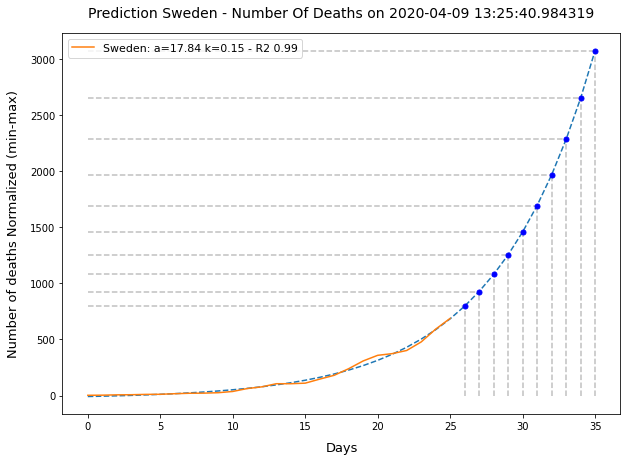

In [31]:
country = 'Sweden'
ndays_prev = 10

xdata_real = np.arange(0, days_since_1_death[country], 1)
country_y = deaths_country_t[country][(len(deaths_country_t) - days_since_1_death[country]):]

xdata_all = np.concatenate((xdata_real, np.arange(xdata_real[-1]+1, xdata_real[-1]+ndays_prev+1, 1)))

popt, pcov = curve_fit(exponential, xdata_real, country_y)

prevs_to_plot = exponential(xdata_all, *popt)
predicted_func = exponential(xdata_real, *popt)
coefficient_of_dermination = r2_score(country_y,  predicted_func)

x_data_prev = np.arange(xdata_real[-1]+1, xdata_real[-1]+ndays_prev+1, 1)
yprevs = prevs_to_plot[(xdata_real[-1]+1):].astype(int).tolist()     

plt.figure(figsize=(10,7))
plt.plot(xdata_all, prevs_to_plot, linestyle='dashed')
plt.plot(xdata_real, country_y, \
         label=f"Sweden: a={round(popt[0], 2)} k={round(popt[1], 2)} - R2 {round(coefficient_of_dermination,2)}")

# _ = plt.xticks(ticks=[x for x in xdata_all if x%5 == 0])
plt.legend(loc='upper left', fontsize=11)
_ = plt.title(f'Prediction Sweden - Number Of Deaths on {today}', fontdict={'fontsize':14}, pad=16.0)
_ = plt.xlabel('Days', fontdict={'fontsize':13}, labelpad=10.0)
_ = plt.ylabel('Number of deaths Normalized (min-max)', fontdict={'fontsize':13}, labelpad=10.0)

for yprev, xday in zip(yprevs, x_data_prev):
    _ = plt.vlines(x=xday, ymin=0,  ymax=yprev, linestyles='dashed', colors='silver')
    _ = plt.hlines(y=yprev, xmin=0, xmax=xday, linestyles='dashed', colors='silver')
    _ = plt.plot(xday, yprev, 'bo', markersize=5)

In [35]:
print ('During the next 10 days we can expect the number of deaths are according to the exponential model: \n', yprevs)

During the next 10 days we can expect the number of deaths are according to the exponential model: 
 [796, 926, 1078, 1253, 1456, 1692, 1965, 2281, 2647, 3072]
